# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Rahul Ravi
- Rachel Doron
- Yohan Kim
- Brian Ripley
- Tianze Zhang

# Abstract 
Our goal is to classify hand signs from American Sign Language (ASL) alphabet. We will be comparing machine learning model accuracy in the classification. This has potential application to those with a hearing disablity. We will be using the Sign Language MNIST dataset consisting of 34000 images which are 28x28 pixels. K-NN, Decision Tree, SVM and CNN will be used and compared using prexisting library implementations. We plan to divide our dataset into 27000+ training cases and about 7200 test cases to achieve our desired results.

# Background

American Sign Language is expressed with hand signs. It is the primary language in the United States for people who are hard of hearing or deaf. In the United States, there are around 10 million people who are hard of hearing and around 1 million people who are functionally deaf[1]. Creating a machine learning algorithm that can recognize ASL hand signs can help these people. Some prior work that has occurred with American Sign Language recognition includes an implementation of an ASL translator on a web application based on a convolutional neural network classifier[2]. Due to a lack of variation in their dataset they were unable to reproduce the validation accuracies they observed during training when they were testing. They hypothesize that with a more robust dataset, their models would be able to generalize more accurately. Creating a machine learning algorithm that can accurately recognize American Sign Language signs can allow people who use ASL to communicate with people who do not know sign language. This will lead them to be able to communicate with a wider range of people that they were not able to do so previously.

# Problem Statement

We want to solve the problem of classifying ASL hand signals with an optimal accuracy of 85% or higher. To achieve this we are going to train our model on the 24 different characters of the ASL alphabet:

We are going to use thousands of real world hand signs of the ASL alphabet in the form of images that we will generalize to a 28 by 28 pixel image. We want to then deploy models to learn on this data and predict the letter of a given hand sign. 

# Data

We are going to be using Sign Language MNIST dataset, located at https://www.kaggle.com/datasets/datamunge/sign-language-mnist. This dataset comprises of 34000 oberservations of various hand signs of the ASL that look this:!

We plan to applying grayscales to our pixels by transforming and mutating their respective matrices, yielding in 784 pixels to analyze. Grayscale images may look like the following: 

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [2]:
data = pd.read_csv('sign_mnist_train.csv') # Since train data is too large to put it into Github, it is recommended to download it and save it in workplace.
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


## Data Analysis

### First, let's check if there is any corrupted values in our dataset.

In [3]:
data.isna().any().sum()

0

In [4]:
data.dtypes.unique()

array([dtype('int64')], dtype=object)

In [5]:
column_val = 'pixel{value}'
for i in range(1, 785):
    if (data[column_val.format(value=i)] < 0).any() or (data[column_val.format(value=i)] > 255).any():
        print("Unexpected value encountered in pixel column {value}".format(value=i))

As we can see from these lines, our dataset looks clean that we don't see any unexpected values from our dataset.

# Proposed Solution

Although we have not experimented with the data yet, we may need to resize the images and convert them to grayscale before using them in our models. We will also normalize the input data by dividing the pixel values by 255. One-hot encoding will be used for the class labels.

We will be implementing several supervised machine learning models to weigh the pros and cons of using such models for image classification. To begin, we will be using the scikit learn implementation of the following: K-Nearest Neighbors (KNN), Decision Tree and Support Vector Machine (SVM). Using sklearn GridSearch, we will optimize the parameters for these models. We will also build a Convolutional Neural Network (CNN) using PyTorch and TensorFLow. We may remove certain models and add new ones as we progress throughout this project, as we will be comparing the accuracies along the way. Other possibilities include RandomForest and Naive Bayes from sklearn.

Each of these models have been previously used for image classification tasks. Although fairly rudimentary, KNN may prove to have decent accuracy by taking a majority vote of the k nearest neighbors according to pixel values in a high dimensional space. A decision tree may prove useful by looking at the edges in the grayscale image at each node to determine which hand signal is present. SVM constructs a set of hyperplanes in a high dimensional space to separate the classes. Due to the complexity of image classification, we expect deep learning to result in the highest accuracy. We will experiment with the number of Conv2D and Dense layers and use Dropout for regualarization.

# Evaluation Metrics

For the evaluation metrics, we plan to use the multi-classes error measures. Instead of having positive/negative as our label values, we plan to have each sign alphabet (all 24 of them), then use suitable variables to calculate specificity and recall for each alphabet. Using this method, we will be able to achieve various insights such as how similar alphabet sign letters are affecting its accuracy/precision of the model, and how different model complexities affect our accuracy/precision of the model.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



### Model: SVM (Support Vector Machine)
In here, we are going to use SVM model to briefly train/test our model.

In [15]:
y_train = data['label']
X_train = data.drop(columns = 'label')

In [7]:
# For testing data
data2= pd.read_csv('sign_mnist_test.csv')
data2

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [16]:
y_test = data2['label']
X_test = data2.drop(columns = 'label')

In [9]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.svm import SVC

model = SVC().fit(X_train, y_train)
model.score(X_test, y_test)

0.8418851087562744

With using baseline model, we see accuracy of 84% using SVM model.

### Model: CNN (Convolutional Neural Network)
Here, we train a simple neural network to classify the hand signs

In [17]:
# Normalize the data
X_train /= 255.0
X_test /= 255.0

# Resize to input CNN
X_train = X_train.values
X_test = X_test.values
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [18]:
from tensorflow.keras import layers, models

model = models.Sequential();
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(25))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 [==============================] - 49s 55ms/step - loss: 1.8729 - accuracy: 0.4308 - val_loss: 0.5461 - val_accuracy: 0.8095
Epoch 2/10
858/858 [==============================] - 46s 54ms/step - loss: 0.1611 - accuracy: 0.9527 - val_loss: 0.3661 - val_accuracy: 0.8820
Epoch 3/10
858/858 [==============================] - 47s 55ms/step - loss: 0.0274 - accuracy: 0.9951 - val_loss: 0.3168 - val_accuracy: 0.9120
Epoch 4/10
858/858 [==============================] - 52s 61ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.2827 - val_accuracy: 0.9158
Epoch 5/10
858/858 [==============================] - 53s 61ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.4178 - val_accuracy: 0.8543
Epoch 6/10
858/858 [==============================] - 67s 78ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.3477 - val_accuracy: 0.9149
Epoch 7/10
858/858 [==============================] - 40s 47ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.3656 - val_accuracy:

225/225 - 3s - loss: 0.3880 - accuracy: 0.9296


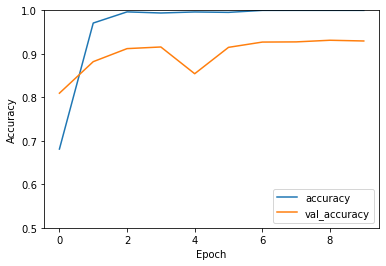

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

Our model is overfitting as we achieve 100% accuracy on the training data yet only 92.9% on the validation data. We will need to make some adjustments perhaphs early stopping, regularization, data augmentation or simplifying the model.

# Ethics & Privacy

As all scientific projects do have little if not, some ethics and privacy concerns for their project data collection / analysis, our project will most likely to have some ethics / privacy concerns too. In regards to the "deon.drivendata.org"'s checklist, one major ethics concern is Analysis section. For data collection and data storage, since the dataset comes from another researcher's project, our data reachability relies on the original project's mind. 

Once we use dataset and analyze according to our standards however, we can violate some analysis checklists in drivendata's checklist. For example, we most likely not to read through all individual data and check biases such as stereotype perpetuation, and imbalanced classes since the dataset contains more than 30,000 individual data in it. In regards to this issue, we plan mitigate this issue by randomly pick couple of data from dataset then manually see the data and its values of it to remove possible bias in dataset. 

# Team Expectations 

1. Communicate over Discord.
2. Check in once a week with a meeting (1 hour when everyone is available)
3. Reach out if you need help.

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/13  |  12AM |  Training model#2   |  Test training model#2
| 5/20  |  12AM |  Summmarize results   |  Discuss results and implications

/Need more work here

# Footnotes

<a name="deafStats"></a>1.[^](#deafStats): Mitchell R. E. (2006). How many deaf people are there in the United States? Estimates from the Survey of Income and Program Participation. Journal of deaf studies and deaf education, 11(1), 112–119. https://pubmed.ncbi.nlm.nih.gov/16177267/<br>
<a name="ASLpaper"></a>2.[^](#ASL): Garcia, B., & Viesca, S. A. (2016). Real-time American sign language recognition with convolutional neural networks. Convolutional Neural Networks for Visual Recognition, 2, 225-232. http://cs231n.stanford.edu/reports/2016/pdfs/214_Report.pdf<br> 